In [2]:
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Display settings
plt.style.use('seaborn-v0_8')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 17.7 MB/s eta 0:00:00


In [11]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], index_col=0)
df.head()


Saving sales.csv to sales (2).csv


,Date,Sales
0,2021-10-01,29.109547
1,2021-10-02,30.720435
2,2021-10-03,30.305173
3,2021-10-04,27.390893
4,2021-10-05,22.841123


In [12]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Set index
df.set_index('Date', inplace=True)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-10-01 to 2022-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


,Sales
Date,
2021-10-01,29.109547
2021-10-02,30.720435
2021-10-03,30.305173
2021-10-04,27.390893
2021-10-05,22.841123


In [13]:
df.isnull().sum()


,0
Sales,0


In [14]:
df = df.fillna(method='ffill')


/tmp/ipython-input-3984534036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


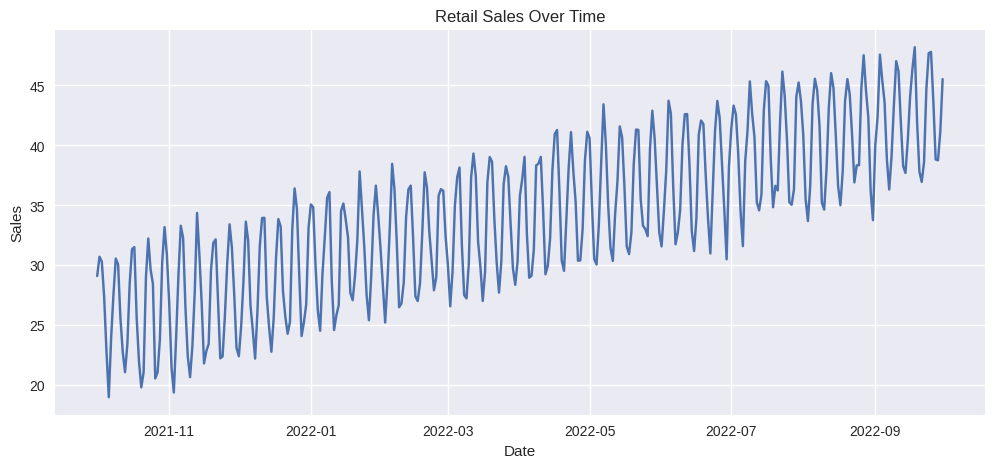

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['Sales'])
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [17]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]


In [19]:
model_arima = auto_arima(train['Sales'],
                         seasonal=False,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True)

model_arima.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1029.921, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1601.350, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1535.193, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1521.016, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1599.358, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1482.894, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=949.977, Time=0.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1022.043, Time=0.64 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=917.817, Time=0.96 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=944.729, Time=0.96 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=908.103, Time=1.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=921.324, Time=0.98 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=893.408, Time=1.47 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -422.258
Date:                Sat, 22 Nov 2025   AIC                            868.516
Time:                        05:35:30   BIC                            912.596
Sample:                    10-01-2021   HQIC                           886.175
                         - 07-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1422      0.022      6.467      0.000       0.099       0.185
ar.L1         -0.3072      0.081     -3.803      0.000      -0.466      -0.149
ar.L2         -0.3435      0.021    -16.412      0.000      -0.384      -0.302
ar.L3         -0.1695      0.029     -5.800      0.000      -0.227      -0.112
ar.L4         -1.0147      0.021    -49.277      0.000      -1.055      -0.974
ar.L5         -0.2123      0.073     -2.921      0.003      -0.355      -0.070
ma.L1         -0.7038      0.074     -9.472      0.000      -0.849      -0.558
ma.L2          0.1805      0.069      2.601      0.009       0.044       0.316
ma.L3         -0.2507      0.072     -3.491      0.000      -0.391      -0.110
ma.L4          0.8336      0.068     12.267      0.000       0.700       0.967
ma.L5         -0.7393      0.064    -11.563      0.000      -0.865      -0.614
sigma2         1.0101      0.103      9.831      0.000       0.809       1.211
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.71   Prob(JB):                         0.43
Heteroskedasticity (H):               1.02   Skew:                             0.12
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
model = SARIMAX(train['Sales'],
                order=model_arima.order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

results.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  292
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -415.502
Date:                Sat, 22 Nov 2025   AIC                            853.004
Time:                        05:37:41   BIC                            893.181
Sample:                    10-01-2021   HQIC                           869.110
                         - 07-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3238      0.094     -3.448      0.001      -0.508      -0.140
ar.L2         -0.1693      0.067     -2.521      0.012      -0.301      -0.038
ar.L3         -0.2958      0.058     -5.133      0.000      -0.409      -0.183
ar.L4         -0.9647      0.058    -16.627      0.000      -1.078      -0.851
ar.L5         -0.1301      0.075     -1.743      0.081      -0.276       0.016
ma.L1         -0.6259      0.093     -6.740      0.000      -0.808      -0.444
ma.L2          0.0398      0.119      0.333      0.739      -0.194       0.274
ma.L3          0.1312      0.150      0.873      0.383      -0.164       0.426
ma.L4          0.7337      0.125      5.867      0.000       0.489       0.979
ma.L5         -0.7165      0.083     -8.606      0.000      -0.880      -0.553
sigma2         1.0073      0.134      7.523      0.000       0.745       1.270
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 2.36
Prob(Q):                              0.47   Prob(JB):                         0.31
Heteroskedasticity (H):               1.06   Skew:                             0.09
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start = test.index[0]
end = test.index[-1]

forecast = results.predict(start=start, end=end)
forecast.head()


,predicted_mean
2022-07-20,34.053022
2022-07-21,37.269000
2022-07-22,42.222676
2022-07-23,45.181019
2022-07-24,43.966065


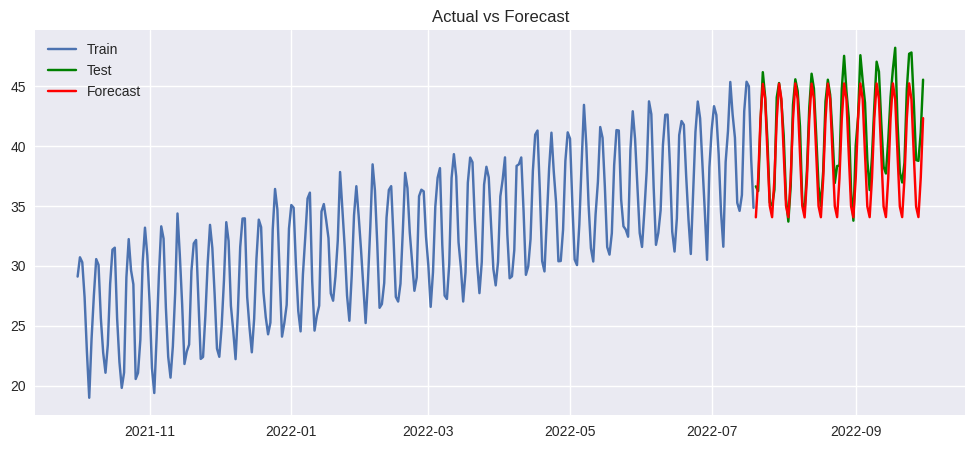

In [23]:
plt.figure(figsize=(12,5))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test', color='green')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('Actual vs Forecast')
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test['Sales'], forecast)
mse = mean_squared_error(test['Sales'], forecast)
rmse = np.sqrt(mse)

mae, rmse


(1.7796122462049808, np.float64(2.184135715051809))

In [37]:
# Generate future 30 dates manually
future_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

# Get forecast values
future_forecast = results.predict(start=len(df), end=len(df)+29)

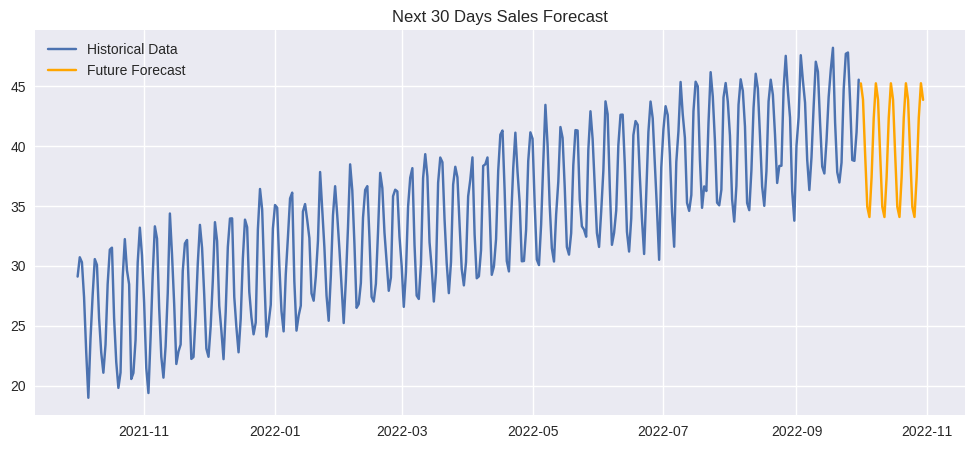

In [38]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Sales'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='orange')
plt.legend()
plt.title('Next 30 Days Sales Forecast')
plt.show()